# 그래프와 시각화 2편

__참고:__ 웨스 맥키니의 <파이썬 라이브러리를 활용한 데이터 분석>의 9장 1절에 사용된 소스코드를 활용한다.

## 기본 설정

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정

## matplotlib.pyplot의 시각화 도구 API

### `plt.plot()` 함수 

간단한 2차원 그래프를 그리는 함수이다.

가장 간단한 사용법은 아래 코드에서처럼 y축 좌표들의 리스트 또는 어레이만 인자로 넣어줄 때이다.
그러면 x축 좌표는 해당 값들의 인덱스가 사용된다.

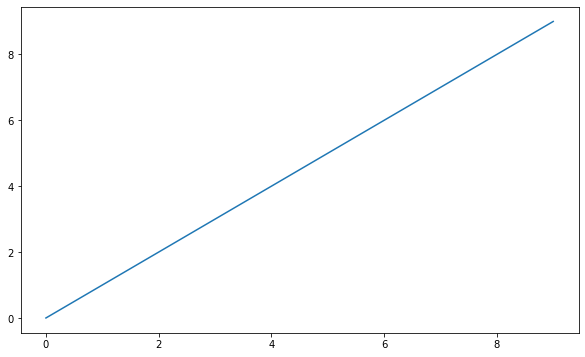

In [2]:
data = np.arange(10)
data
plt.plot(data)  # y축에 사용되는 값만 사용. x축 값은 인덱스가 대신 사용됨.

__참고:__ 공식 문서: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### `Figure` 객체와 서브플롯(subplot)

모든 그래프는 `Figure` 객체 내에 존재하며, `plt.figure()` 함수에 의해 생성된다.

In [3]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

`Figure` 객체 내에 그래프를 그리려면 서브플롯(subplot)을 지정해야 한다.
아래 코드는 `add_subplot()` 함수를 이용하여 지정된 `Figure` 객체안에 그래프를 그릴 공간을 준비한다.

- 인자 `(2, 2, 1)`의 의미: 2x2 크기의 공간을 확보하며, 4개의 공간 각각에 그래프를 삽입할 수 있는데
    그중에 첫째 공간을 가리킨다.
    

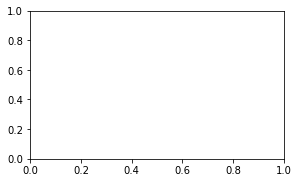

In [4]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)

두 개의 그래프 공간을 더 추가하면 다음과 같다.

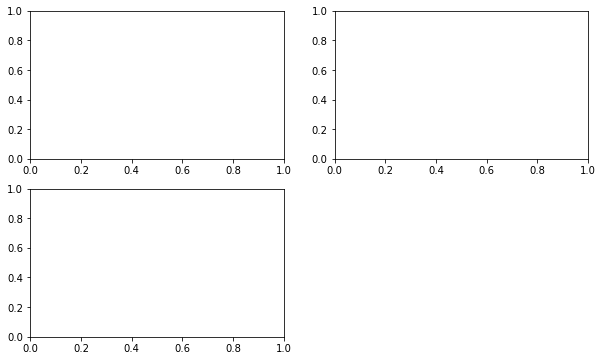

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#### 그래프 삽입하기

두 가지 방식으로 각각의 서브플롯에 그림을 삽입할 수 있다.

##### 방식 1: `plt.plot()` 함수 활용

이 방식은 항상 마지막에 선언된 서브플롯에 그래프를 그린다.
예를 들어 아래 코드는 무작위로 선택된 50개의 정수들의 누적합으로 이루어진 데이터를
파선 그래프로 그린다.

__참고:__ 어레이가 주어졌을 때 해당 어레이의 누적합 어레이는 동일한 크기를 가지면서
인덱스별 항목은 0번 인덱스부터 해당 인덱스의 항목까지의 합으로 지정된다.

- `cumsum()` 메서드: 주어진 어레이에 포함된 항목들의 누적합으로 이루어진 어레이를 반환한다.

In [40]:
from numpy.random import randn

data = np.random.randn(50).cumsum()

In [44]:
data

array([-1.2241, -3.025 , -1.3902, -0.4012,  0.0567,  0.6119,  1.9186,
        1.478 ,  1.1767,  1.6755,  0.8515,  2.172 ,  2.68  ,  2.0266,
        2.2135,  1.8218,  1.5495,  1.5324,  2.2127,  2.8482,  2.091 ,
        2.8091,  2.5049,  0.8271,  1.254 , -0.3097, -0.6772,  0.3687,
        1.5887,  1.341 ,  0.9248,  0.808 , -1.0368,  1.0319,  0.255 ,
        1.6951,  1.5846,  2.812 ,  4.7327,  5.4792,  7.7038,  7.0244,
        7.7518,  6.8831,  5.6692,  5.1986,  4.2793,  3.4405,  3.8757,
        3.3179])

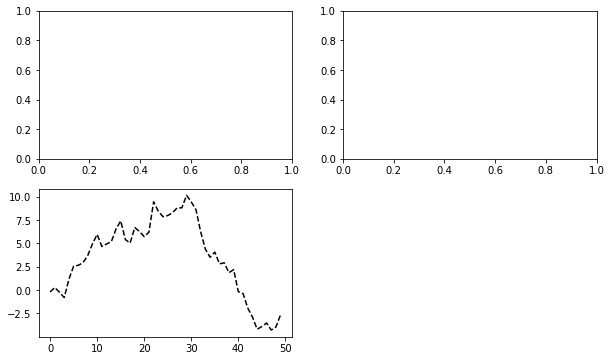

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(data, 'k--')

__주의사항:__ 주피터 노트북을 사용할 경우 `plt.figure()`, `add_subplot()` 등 직접 그래프를 그리고
관리하는 함수들은 모두 하나의 셀에서 실행되어야 한다. 

##### 방식 2: `객체명.plot()` 함수 활용

특정 서브플롯에 그래프를 삽입하려면 객체 이름과 함께 `plot()` 함수 등을 호출해야 한다.

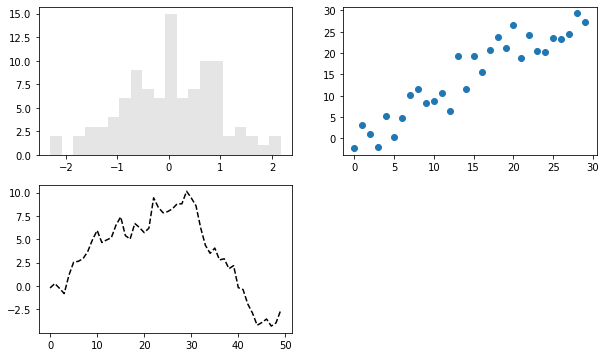

In [8]:
np.random.seed(12345)


fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 위치: (2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

# 위치: (2, 2, 1)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.1)

# 위치: (2, 2, 2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

plt.show()

#### 서브플롯 관리

`plt.subplots()` 함수는 여러 개의 서브플롯을 포함하는 `Figure` 객체를 관리해준다.
예를 들어, 아래 코드는 2x3 크기의 서브플롯을 담은 (2,3) 모양의 넘파이 어레이로 생성한다.

* 반환값: `Figure` 객체와 지정된 크기의 넘파이 어레이. 각 항목은 서브플롯 객체임.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

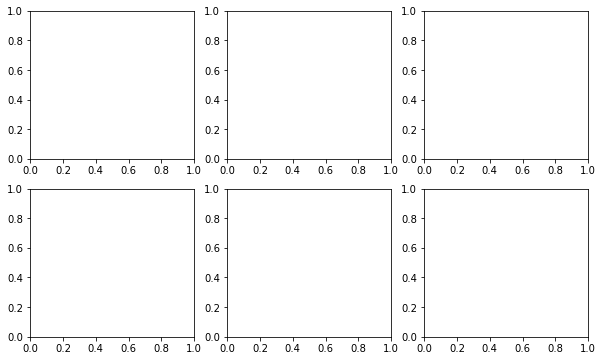

In [9]:
fig, axes = plt.subplots(2, 3)
axes

`plt.subplots_adjust()` 함수는 각 서브플롯 사이의 여백을 조절하는 방식을 보여준다. 
여백의 크기는 그래프의 크기와 숫자에 의존한다.

* 여백이 0일 때:

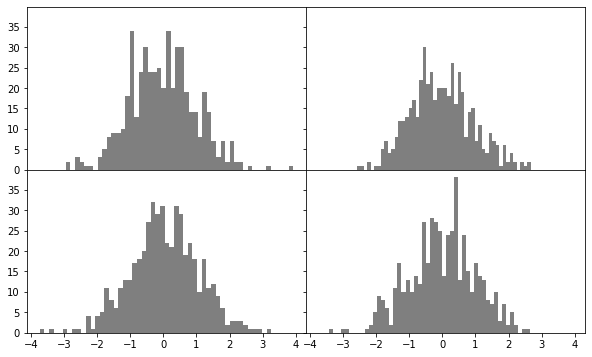

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0) # 상하좌우 여백: 0

* 여백이 1일 때:

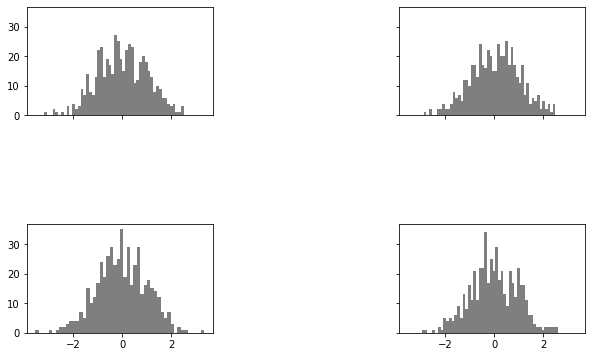

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=1, hspace=1)   # 상하좌우 여백: 1

### 색상, 마커, 선 스타일

그래프의 속성을 여러 방식으로 지정할 수 있다.

* 방식 1: 문자열 방식

    ```python
    ax.plot(x, y, 'g--')
    ```

* 방식 2: 키워드 인자 지정 방식

    ```python
    ax.plot(x, y, linestyle='--', color='g')
    ```

아래 두 코드는 동일한 그림을 그려준다.
단, 무작위성 때문에 무작위성의 시드(seed)를 지정해줘야 한다.

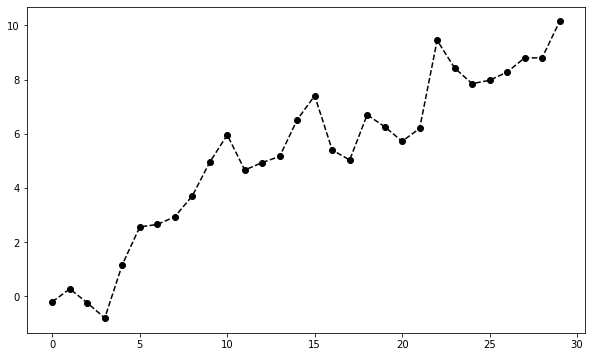

In [12]:
np.random.seed(12345)

plt.plot(randn(30).cumsum(), 'ko--')

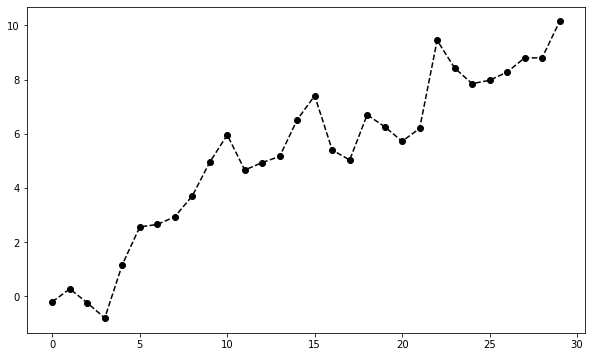

In [13]:
np.random.seed(12345)
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

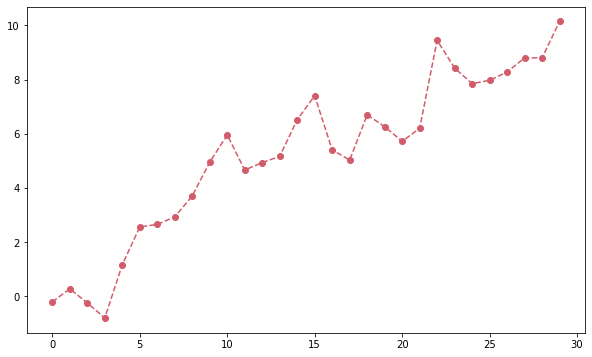

In [14]:
np.random.seed(12345)
plt.plot(randn(30).cumsum(), color='#d25c6a', linestyle='--', marker='o')

색상은 RGB 값을 HEX 코드를 이용하여 직접 사용할 수도 있다.

__참고:__ [RGB 색상의 HEX 코드 찾기](https://www.w3schools.com/colors/colors_rgb.asp)

#### 여러 그래프 하나의 서브플롯에 그리기

여러 스타일의 그래프를 하나의 서브플롯에 그려 다양한 정보를 동시에 전달할 수도 있다.

In [15]:
np.random.seed(12345)
data = np.random.randn(30).cumsum()

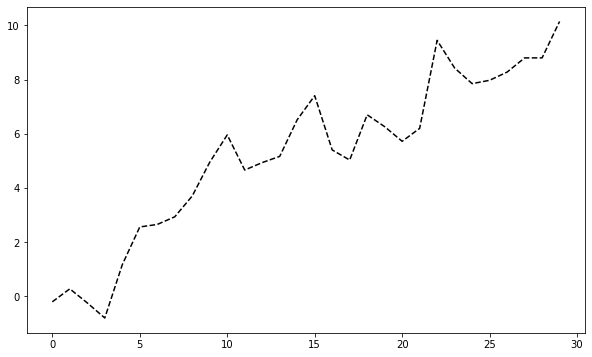

In [16]:
plt.plot(data, 'k--', label='Default')

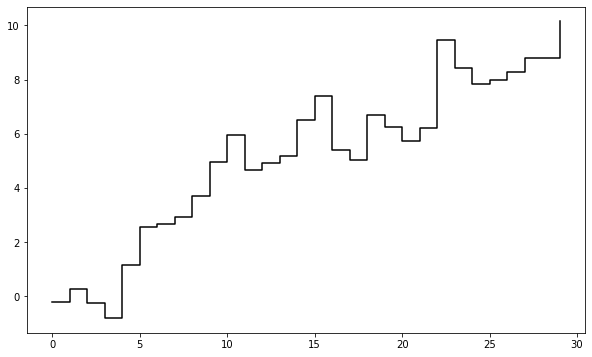

In [17]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

`plt.legend()` 함수는 각 그래프의 `label` 속성 정보를 이용하여 범례를 적절한 곳에 생성한다.

- `loc='best'`: 범례 위지 지정. 기본값은 가장 적절한 곳으로 자동 지정.

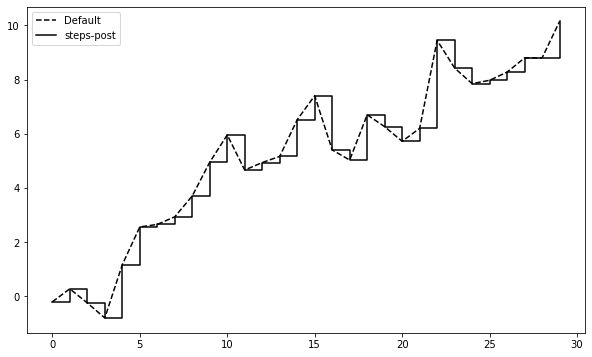

In [18]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')  # 범례 추가

### 눈금과 라벨

#### 이미지 타이틀, 축 이름, 눈금, 눈금 이름 지정

두 가지 방식으로 진행할 수 있다.

##### 방식 1: 파이플롯 객체의 메서드 활용

- `set_xticks()` 함수: 눈금 지정
- `set_xticklabels()` 함수: 눈금 라벨 지정
- `set_title()` 함수: 그래프 타이틀 지정
- `set_xlabel()` 함수: x축 이름 지정

In [19]:
data = np.random.randn(1000).cumsum()

Text(0.5, 0, 'Stages')

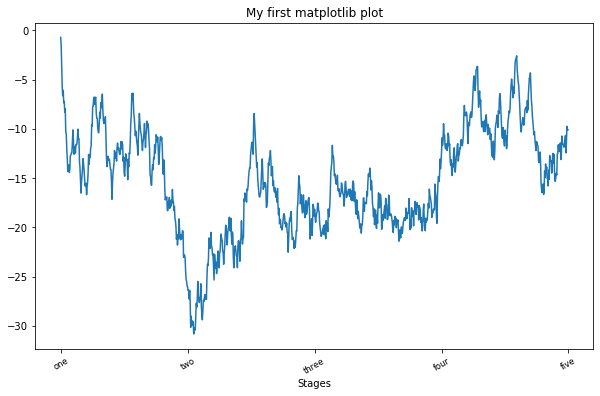

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

##### 방식 2: pyplot 모듈의 함수 활용

이 방식은 마지막에 선언된 서브플롯에 대해서만 작동한다.

- `plt.xticks()` 함수: 눈금 및 눈금 라벨 지정
- `plt.title()` 함수: 그래프 타이틀 지정
- `plt.xlabel()` 함수: x축 이름 지정

Text(0.5, 0, 'Stages')

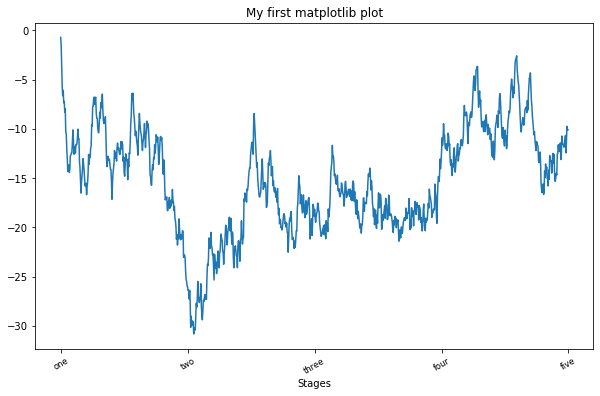

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)

plt.xticks([0, 250, 500, 750, 1000], ['one', 'two', 'three', 'four', 'five'],
            rotation=30, fontsize='small')

plt.title('My first matplotlib plot')
plt.xlabel('Stages')

### 서브플롯에 주석 및 도형 추가하기

#### 주석 추가

설명을 위해 S&P 500 (스탠다드 앤 푸어스, Standard and Poor's 500)의 미국 500대 기업을 포함한 
주식시장지수 데이터로 그래프를 생성하고 2007-2008년 사이에 있었던 
재정위기와 관련된 중요한 날짜를 주석으로 추가한다.

In [22]:
spx_path = 'https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/examples/spx.csv'

In [23]:
data = pd.read_csv(spx_path)
data

,Unnamed: 0,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75
...,...,...
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66


여기서는 시간 컬럼을 행의 인덱스로 사용한다.

- `index_col=0`: 0번 열(column)을 인덱스로 사용
- `parse_dates=True`: 년월일까지만 구분해서 인덱스로 사용하도록 함. 기본값은 `False`.

In [24]:
data = pd.read_csv(spx_path, index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


__참고:__ `parse_dates=True` 를 지정하지 않으면 원래 그대로 가져온다. 

```python
data = pd.read_csv(spx_path, index_col=0)
```

하나의 열만 존재하는 데이터프레임이기에 시리즈로 변환한다.

__참고:__ 반드시 필요한 과정은 아니다. `spx` 대신 `data`를 그대로 사용해도 동일하게 작동한다.

In [25]:
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

위 데이터를 단순하게 그래프로 나타내면 다음과 같다.

__참고:__ 판다스의 시리즈와 데이터프레임은 자체적으로 `plot()` 메서드를 지원한다.

<AxesSubplot:>

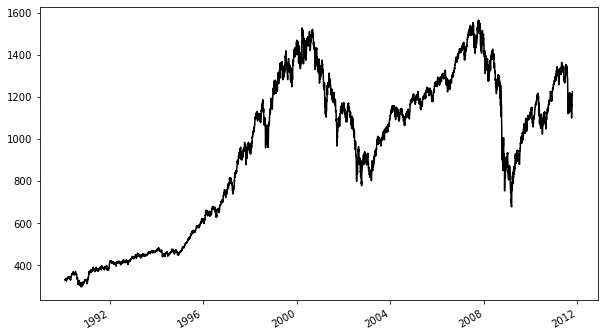

In [26]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# ax.plot(spx, 'k-')
spx.plot(ax=ax, style='k-')

2007-2008년 세계적 금융위기 지점을 아래 내용으로 그래프에 주석으로 추가해보자.

- 2007년 10월 11일: 주가 강세장 위치
- 2008년 3월 12일: 베어스턴스 투자은행 붕괴
- 2008년 9월 15일: 레만 투자은행 파산

In [27]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

#### `annotate()` 메서드 활용

- `xt` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

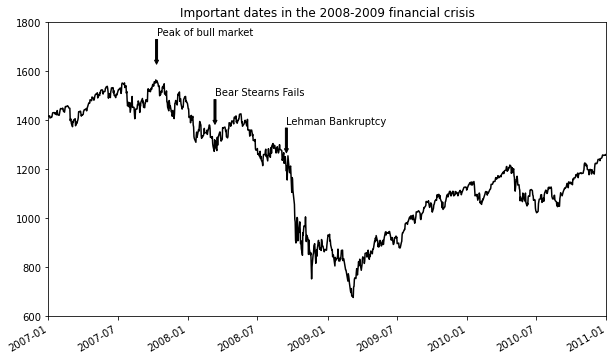

In [28]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

#### 도형 추가

지정된 함수를 이용하여 다양한 도형을 추가할 수 있다.

- `plt.Rectangle()`: 직사각형. 왼편 아래 좌표 및 가로 세로 길이
- `plt.Circle()`: 원. 원의 중심 좌표 및 반지름.
- `plt.Polygon()`: 다각형. 각 꼭지점의 좌표.

__주의사항:__ x, y축의 눈금이 다르면 도형이 정확하게 표현되지 않을 수 있다.
예를 들어, 아래에서 원이 타원으로 보이는 이유가 두 축의 척도가 다르기 때문이다.

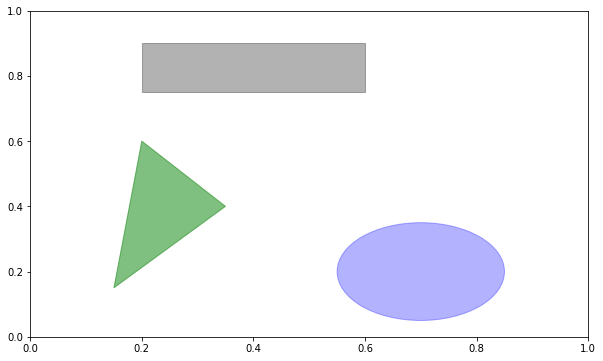

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

척도를 맞추는 방법으로 `Figure` 객체를 생성할 때 두 축의 크기를 동일하게 지정하면 된다.

- `figsize` 키워드 인자 활용

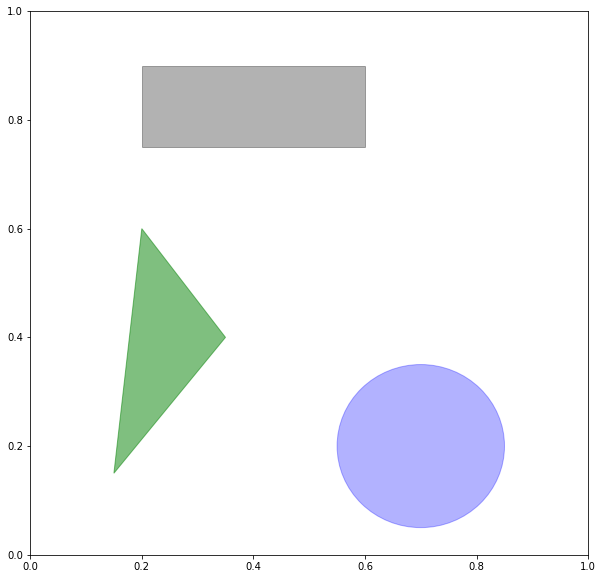

In [30]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

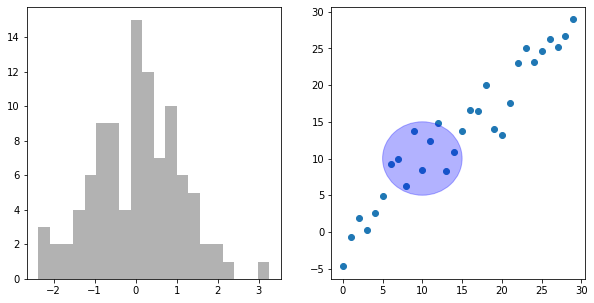

In [31]:
np.random.seed(12345)


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 위치: (1, 2, 1)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)

# 위치: (1, 2, 2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

# 도형 추가
circ = plt.Circle((10, 10), 5, color='b', alpha=0.3)
ax2.add_patch(circ)
    

plt.show()

### 그래프 저장하기

`plt.savefig()` 함수를 이용하여 그래프를 원하는 포맷의 파일로 저장할 수 있다.

- `dpi=100`: 인치당 픽셀 수. 저장된 이미지의 해상도 지정.
- `bbox_inches=tight`: 이미지별 둘레의 공백 지정. 여기서는 공백을 거의 사용하지 말라는 의미임.

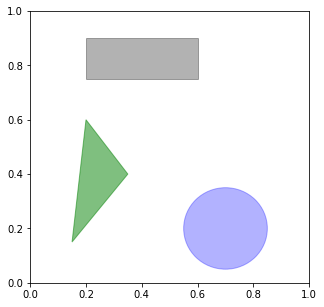

In [32]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('figpath.png', dpi=100, bbox_inches='tight')

### matplotlib 기본 설정

`plt.rc()` 함수를 이용하여 matplot을 이용하여 생성되는 이미지 관련 설정을 전역적으로 지정할 수 있다.
사용되는 형식은 다음과 같다.

- 첫째 인자: 속성 지정
- 둘째 인자: 속성값 지정

__참고:__ 'rc' 는 기본설정을 의미하는 단어로 많이 사용된다. 
풀어 쓰면 "Run at startup and they Configure your stuff", 
즉, "프로그램이 시작할 때 기본값들을 설정한다"의 의미이다.
'.vimrc', '.bashrc', '.zshrc' 등 많은 애플리케이션의 초기설정 파일명에 사용되곤 한다.

아래 코드는 이미지의 사이즈를 지정한다.

In [33]:
plt.rc('figure', figsize=(10, 10))

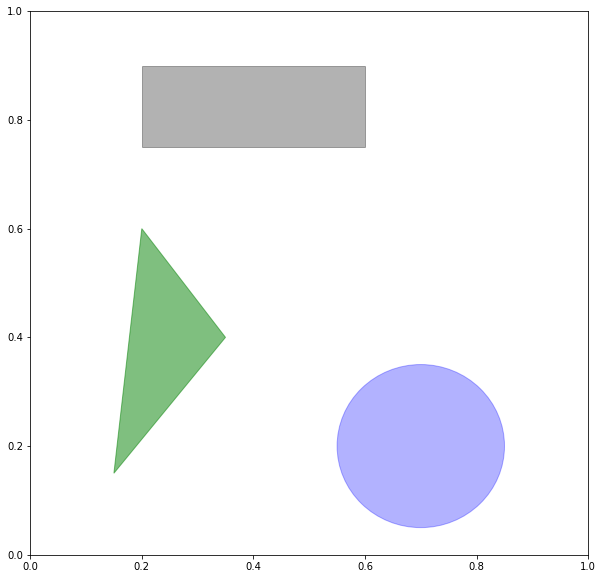

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

아래 코드는 다양한 속성을 지정하는 방식을 보여준다.

* 이미지 사이즈 지정

In [35]:
plt.rc('figure', figsize=(10, 6))

* 선 속성 지정

In [36]:
plt.rc('lines', linewidth=3, color='b')

* 텍스트 폰트 속성 지정

In [37]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : '15'}
plt.rc('font', **font_options)

* 그래프 구성 요소의 색상 지정

In [38]:
plt.rcParams['text.color'] = 'blue'
plt.rcParams['axes.labelcolor'] = 'red'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = '#CD5C5C'  # RGB 색상

아래 코드는 앞서 설정된 다양한 속성을 반영한 결과를 보여준다.

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

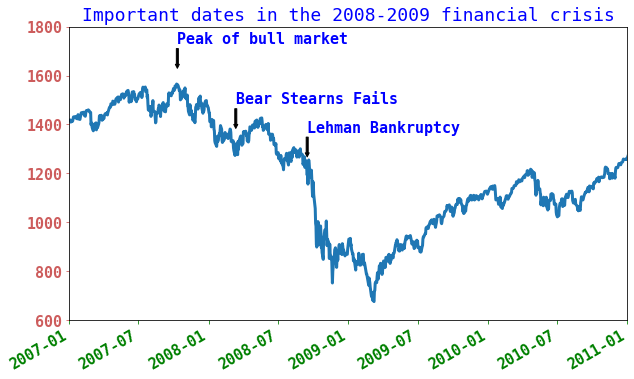

In [39]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# spx.plot(ax=ax, style='k-')
spx.plot(ax=ax, style='-')    # 기본 색상 사용

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')